In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [37]:
print(datetime.__version__)

AttributeError: module 'datetime' has no attribute '__version__'

In [2]:
df_total = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

<ipython-input-3-03694a700e61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df_total['data']).dt.date


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'öbitos')

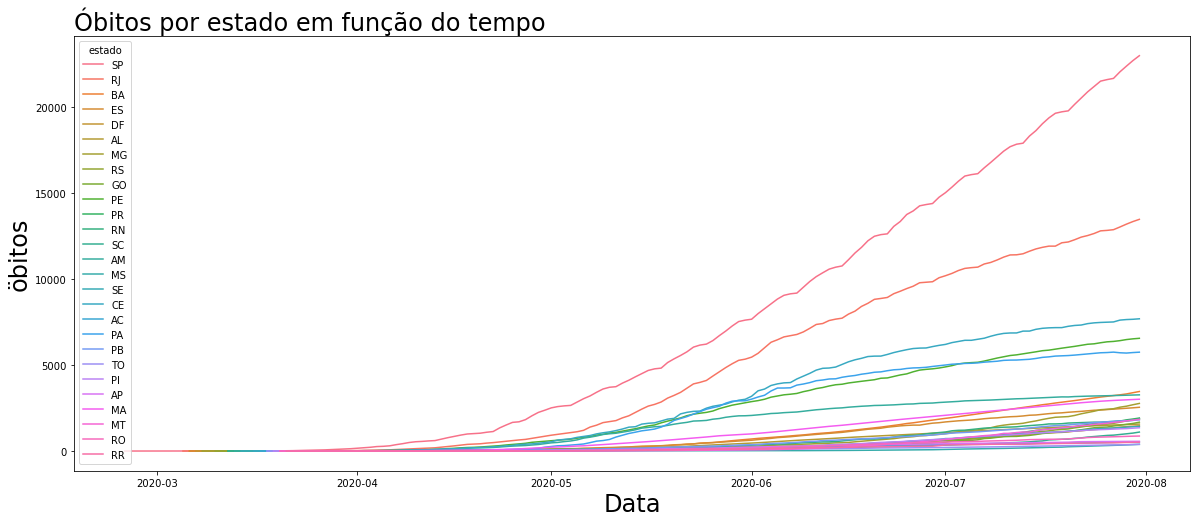

In [4]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('öbitos', fontsize=24)

In [5]:
df_sp = df[df['estado']== 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


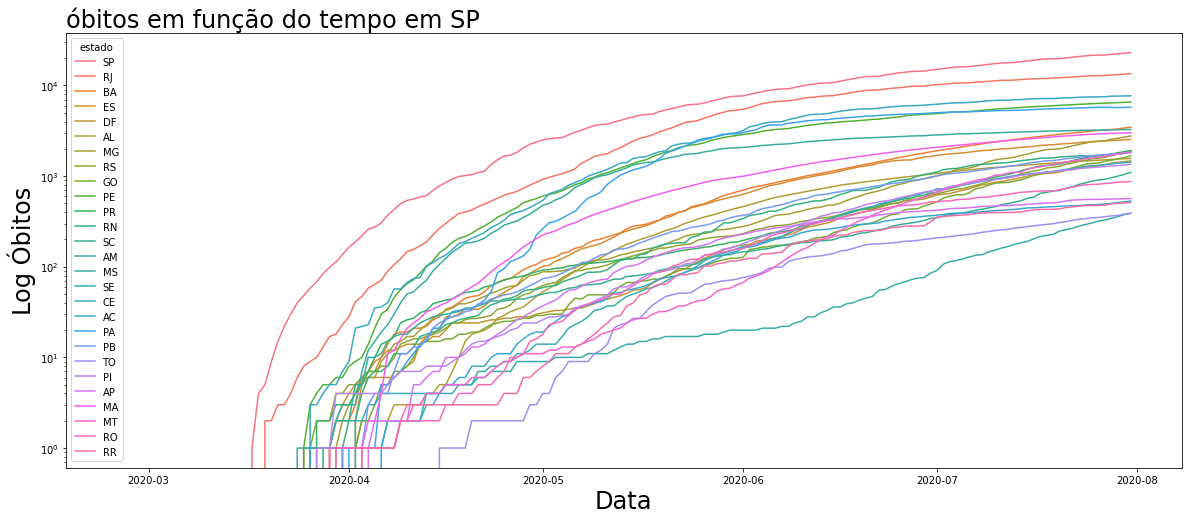

In [6]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('óbitos em função do tempo em SP', loc='left', fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

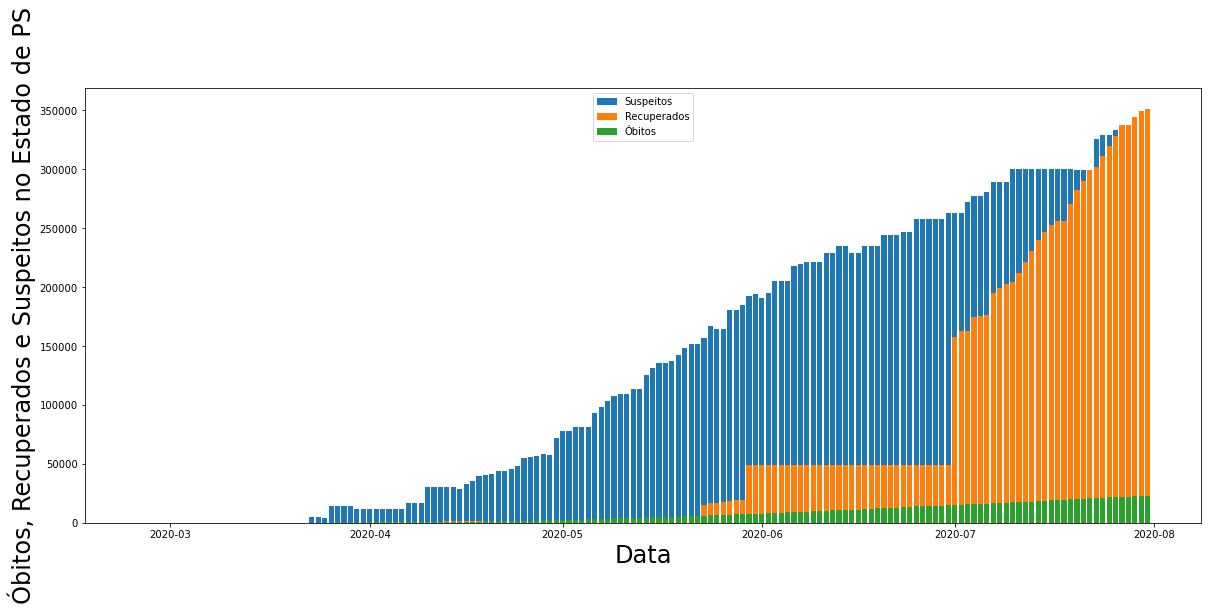

In [7]:
plt.figure(figsize=(20,8))
plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no Estado de PS',  fontsize=24, rotation = 90)
plt.legend()

In [8]:
def plotar_linha(titulo, xlabel, ylabel, x ,y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)
    

In [9]:
def plotar_barra(titulo, xlabel, ylabel, x,y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

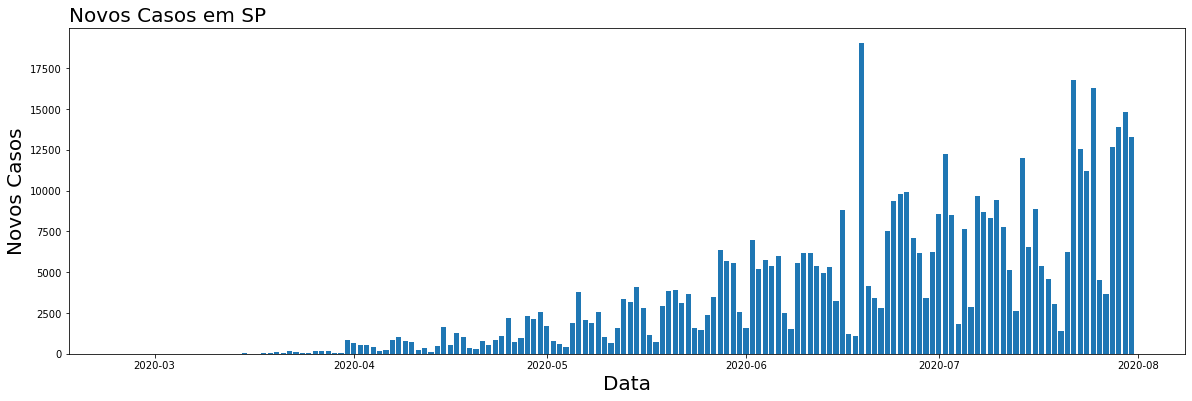

In [10]:
plotar_barra('Novos Casos em SP', 'Data', 'Novos Casos', 'data', 'novosCasos', df_sp)

In [11]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

<ipython-input-11-7f18082c4237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
<ipython-input-11-7f18082c4237>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


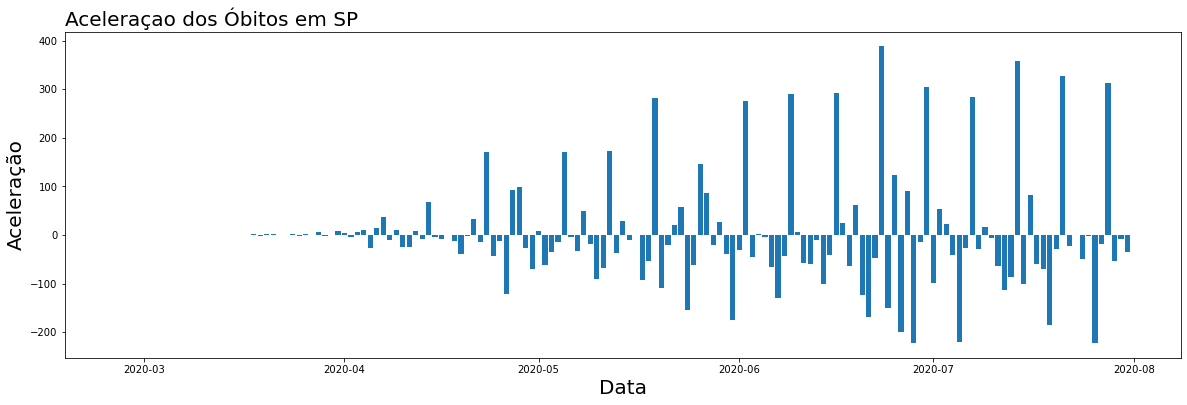

In [12]:
plotar_barra('Aceleraçao dos Óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

In [13]:
df_sp['mediaObitos'] =  df_sp.novosObitos.rolling(window=7, center=False).mean()
df_sp['mediaObitos14'] = df_sp.novosObitos.rolling(window=14, center=False).mean()
df_sp.tail()

<ipython-input-13-c509fc8e39bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos'] =  df_sp.novosObitos.rolling(window=7, center=False).mean()
<ipython-input-13-c509fc8e39bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos14'] = df_sp.novosObitos.rolling(window=14, center=False).mean()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos14
3847,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,...,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0,269.714286,269.214286
3875,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,...,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0,269.714286,266.785714
3903,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,...,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0,265.285714,267.785714
3931,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,...,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886,913.0,-9.0,259.428571,262.285714
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,...,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886,-1511.0,-34.0,255.857143,258.571429


<BarContainer object of 158 artists>

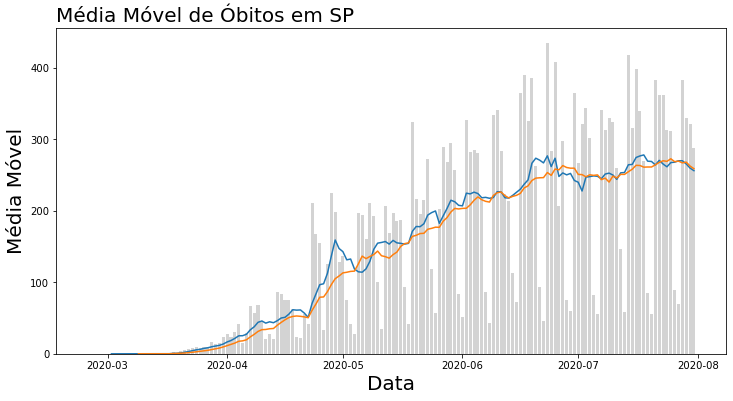

In [14]:
plotar_linha('Média Móvel de Óbitos em SP', 'Data', 'Média Móvel', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média Móvel de Óbitos em SP', 'Data', 'Média Móvel', 'data', 'mediaObitos14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

In [15]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

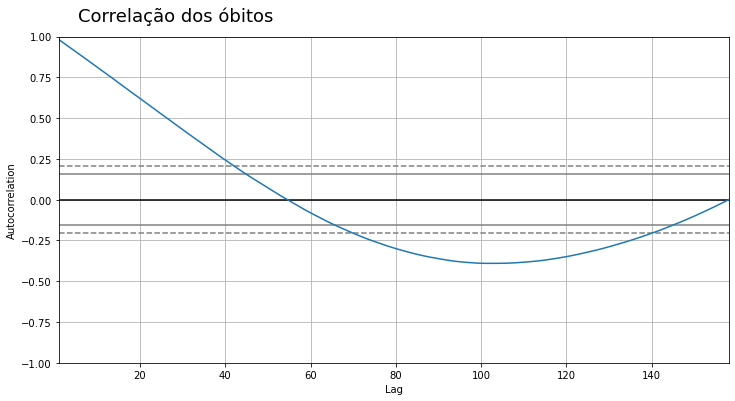

In [16]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos', fontsize=18, x=.26, y=.95)
autocorrelation_plot(df_sp['Obitos'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

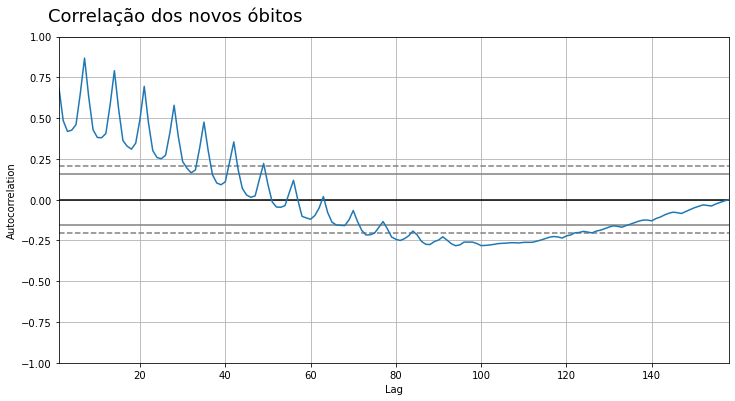

In [17]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos', fontsize=18, x=.26, y=.95)
autocorrelation_plot(df_sp['novosObitos'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

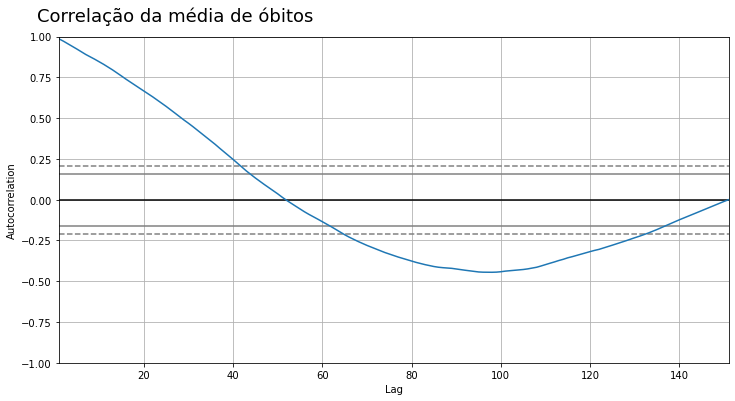

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da média de óbitos', fontsize=18, x=.26, y=.95)
autocorrelation_plot(df_sp['mediaObitos'][7:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

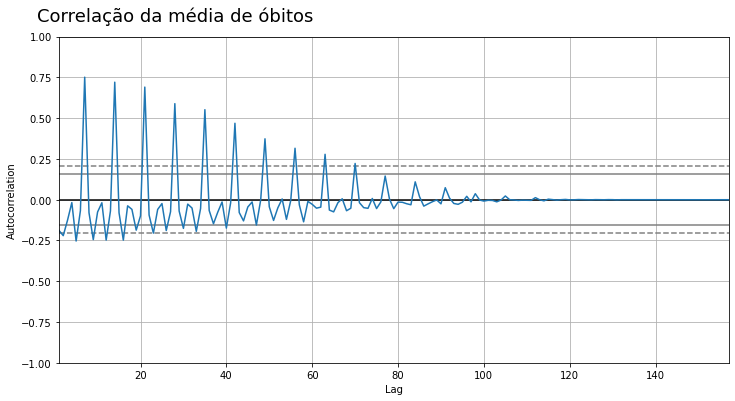

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da média de óbitos', fontsize=18, x=.26, y=.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])

In [20]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

<ipython-input-20-ae63a6fa72df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mes'] = pd.to_datetime(df_sp['data'])
<ipython-input-20-ae63a6fa72df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [21]:
dias_traduzidos = {'Monday' : 'Segunda' , 'Tuesday' : 'Terça' , 'Wednesday' : 'Quarta' , 'Thursday' : 'Quinta' , 'Friday' : 'Sexta' , 'Saturday' : 'Sábado' , 'Sunday' : 'Domingo'}
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

<ipython-input-21-1526ae86c080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)


In [22]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp

<ipython-input-22-5afe9aa86918>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()


,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Sábado,6786.0,155.0,-17.0,Sábado
Terça,6794.0,206.0,175.0,Terça


In [23]:
agrupados_sp = agrupados_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta', 'Sexta','Sábado'])
agrupados_sp

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sexta,7342.0,177.0,-13.0,Sexta
Sábado,6786.0,155.0,-17.0,Sábado


C:\Users\HCMDS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dia_da_semana', ylabel='novosObitos'>

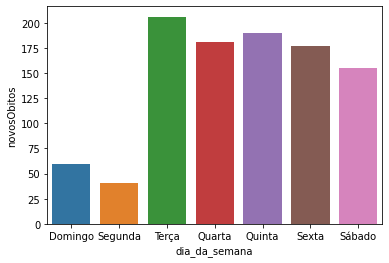

In [31]:
sns.barplot(agrupados_sp['dia_da_semana'],agrupados_sp.novosObitos, data=agrupados_sp)

<BarContainer object of 158 artists>

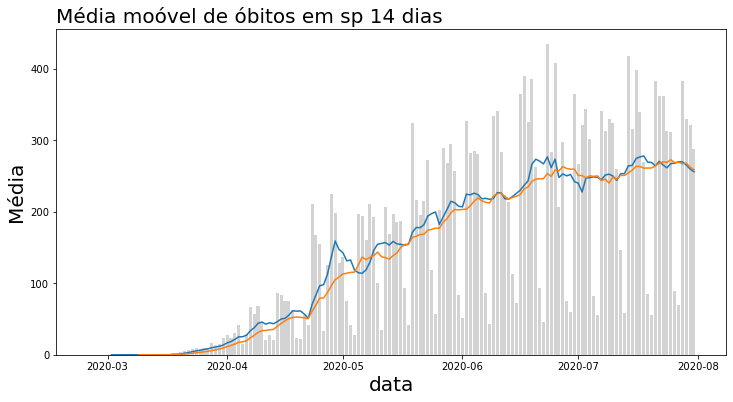

In [25]:
plotar_linha('Média moóvel de óbitos em sp 7 dias', 'data','Média','data','mediaObitos', df_sp, None)
plotar_linha('Média moóvel de óbitos em sp 14 dias', 'data','Média','data','mediaObitos14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

In [26]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.day_of_week
    df['diames'] = df.mes.dt.day
    df['mes'] = df.mes.dt.month
    
    
    X = df[['diasemana', 'mes', 'diames']]
    
    if label:
        y= df[label]
        return X, y
    return X

In [27]:
X,y = criar_features(df_sp, label='Obitos')

In [28]:
df_final = pd.concat([X, y], axis=1)

In [38]:
df_final.head(20)

,diasemana,mes,diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


Text(0.5, 0.98, 'öbitos por dia do da semana, dia do mês e mes')

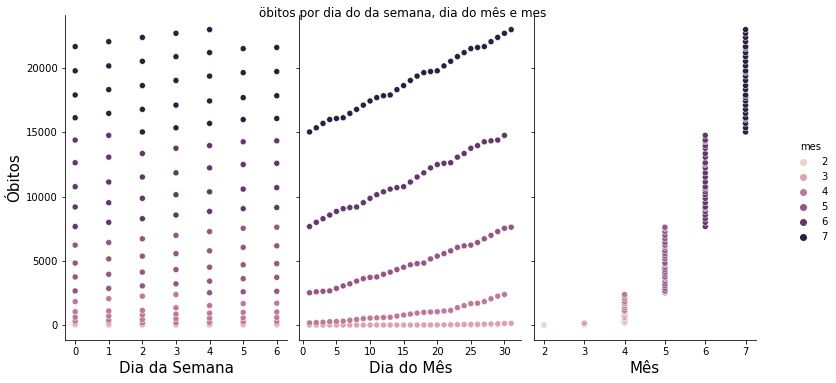

In [30]:
g = sns.pairplot(df_final.dropna(), 
                hue='mes',
                x_vars=['diasemana','diames','mes'],
                y_vars='Obitos')
g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da Semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do Mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('öbitos por dia do da semana, dia do mês e mes')